# Linear Regression exercise

Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data. One variable is considered to be an explanatory variable, and the other is considered to be a dependent variable. 

Given a dataset $D=\left\{\left(\boldsymbol{x}_{1}, y_{1}\right),\left(\boldsymbol{x}_{2}, y_{2}\right), \ldots,\left(\boldsymbol{x}_{m}, y_{m}\right)\right\}$, linear regression tries to determine a function with the form:

$$f(\boldsymbol{x})=\boldsymbol{w}^{\mathrm{T}} \boldsymbol{x}+b$$

to fit $f(\boldsymbol{x}_{i})$ and $y_i$

The target of this assignment is to predict housing prices on [boston housing dataset](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html) with linear regression algorithm. Ridge regression and lasso regression are required in this exercise.

## Table of Contents

- [1 - Packages](#1)
- [2 - Load the Dataset](#2)
- [3 - Linear Regression](#3)
  - [3.0 - Preparation](#3-0)
  - [3.1 - Ridge regression](#3-1)
  - [3.2 - Lasso regression](#3-2)

<a name='1'></a>
## 1 - Packages

First import all the packages needed during this assignment.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

%load_ext autoreload
%autoreload 2

<a name='2'></a>
## 2 - Load the Dataset 

In [2]:
# access housing price data from the scikit-learn library
from sklearn.datasets import load_boston
boston_dataset = load_boston()

As it is described in [sklearn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html), `boston_dataset` is a dict-like object contains following attributes:

* data, `ndarray` of shape (506, 13), the data matrix
* target, `ndarray` of shape (506,), the regression target
* filename, `str`, the physical location of boston csv dataset.
* DESCR, `str`, the full description of the dataset.
* feature_names, `ndarray`: the names of features

In [3]:
# load the data into a pandas dataframe using pd.DataFrame
data = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


For convenience, add the housing price into `data`

In [4]:
data['Price'] = boston_dataset.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Now, split boston housing dataset into training set and testing set. We use 80% of data for training and 20% of data for testing.

In [5]:
data = data.sample(frac=1).reset_index(drop=True)  # shuffle dataframe rows

rows, columns = data.shape
training_set_size  = int(rows * 0.8)
testing_set_size = rows - training_set_size

training_data, testing_data = data.head(training_set_size).reset_index(drop=True), data.tail(testing_set_size).reset_index(drop=True)
print('size of training data %s' % str(training_data.shape))
print('size of testing data %s' % str(testing_data.shape))

size of training data (404, 14)
size of testing data (102, 14)


<a name='3'></a>
## 3 - Linear Regression

For converience, let $\boldsymbol{w}=(\boldsymbol{w} ; b)$, $\boldsymbol{x}=(\boldsymbol{x} ; 1)$. Thus, the equaiton of linear regression is equal to:
$f(\boldsymbol{x})=\boldsymbol{w}^{\mathrm{T}} \boldsymbol{x}$

The dataset can be represented as a matrix $\boldsymbol{X}$ and vector $\boldsymbol{y}$:
$$
\mathbf{X}=\left(\begin{array}{ccccc}
x_{11} & x_{12} & \ldots & x_{1 d} & 1 \\
x_{21} & x_{22} & \ldots & x_{2 d} & 1 \\
\vdots & \vdots & \ddots & \vdots & \vdots \\
x_{m 1} & x_{m 2} & \ldots & x_{m d} & 1
\end{array}\right)=\left(\begin{array}{cc}
x_{1}^{\mathrm{T}} & 1 \\
\boldsymbol{x}_{2}^{\mathrm{T}} & 1 \\
\vdots & \vdots \\
\boldsymbol{x}_{m}^{\mathrm{T}} & 1
\end{array}\right)
$$
$$
\boldsymbol{y}=\left(y_{1} ; y_{2} ; \ldots ; y_{m}\right)
$$

Normally, we would minimize the mean square error between $f(\boldsymbol{X})$ and $\boldsymbol{y}$:
$$
\min _{\boldsymbol{w}}\|\boldsymbol{X} {\boldsymbol{w}}-\boldsymbol{y}\|_{2}^{2}
$$

<a name='3-0'></a>
### 3.0 - preparation

In [6]:
# Turn data objects into numpy arrays to allow for easier matrix calculations
X_train = (training_data.loc[:, training_data.columns!='Price']).to_numpy()
X_test = (testing_data.loc[:, testing_data.columns!='Price']).to_numpy()
y_train = (training_data.loc[:, training_data.columns=='Price']).to_numpy()
y_test = (testing_data.loc[:, testing_data.columns=='Price']).to_numpy()

In [7]:
def calculate_error(pred, gt):
    bias = pred - gt
    mean_absolute_error = np.mean(np.abs(bias))
    mean_square_error = np.mean(bias ** 2)
    return mean_absolute_error, mean_square_error

def plot_prices(pred, gt):
    """Visualize the differences between actual prices and predicted values"""
    plt.scatter(pred, gt)
    plt.xlabel("Predicted prices")
    plt.ylabel("Prices")
    plt.title("Prices vs Predicted prices")
    
def plot_residuals(pred, gt):
    """Visualize residuals"""
    plt.scatter(pred, gt-pred)
    plt.title("Predicted vs residuals")
    plt.xlabel("Predicted")
    plt.ylabel("Residuals")
    
def plot(pred, gt):
    plt.figure(figsize=(8, 3))
    plt.subplot(1, 2, 1)
    plot_prices(pred, gt)
    plt.subplot(1, 2, 2)
    plot_residuals(pred, gt)
    plt.show()
    
def evaluate(model, X, y):
    pred = model.predict(X_test).reshape(-1, 1)  # reshape to column vector
    mae, mse = calculate_error(pred, y_test)

    print('Error on testing set:')
    print(f'MAE: {mae}\nMSE: {mse}')

    plot(pred, y_test)

<a name='3-1'></a>
### 3.1 - Ridge regression

Ridge regression imposes a penalty on the size of the coefficients. The ridge coefficients minimize a penalized residual sum of squares:
$$
\min _{\boldsymbol{w}}\|\boldsymbol{X} {\boldsymbol{w}}-\boldsymbol{y}\|_{2}^{2}+\alpha\|\boldsymbol{w}\|_{2}^{2}
$$

Define loss function as: $L(\boldsymbol{w}, \alpha)=|\boldsymbol{X} {\boldsymbol{w}}-\boldsymbol{y}\|_{2}^{2}+\alpha\|\boldsymbol{w}\|_{2}^{2}$. Take the partial derivative with respect to $\boldsymbol{w}$, make it equal to $0$ and we can get the solution for $\boldsymbol{w}$.

$$
\begin{aligned}
L(w, \alpha) &=\|X w-y\|^{2}+\alpha\|w\|^{2} \\
&=(X w-y)^{T}(X w-y)+\alpha w^{T} w \\
&=\left(w^{T} X^{T}-y^{T}\right)(X w-y)+\alpha w^{T} w \\
&=w^{T} X^{T} X w-2 w^{T} X^{T} y+y^{T} y+\alpha w^{T} w
\end{aligned}
$$

Suppose $w^{T} w \rightarrow w^{2}$ then
$$
\begin{aligned}
\frac{\partial L}{\partial w} &=2 X^{T} X w-2 X^{T} y+2 \alpha w \\
&=2\left(X^{T} X+\alpha I\right) w-2 X^{T} y \\
&=0 \\ 
2 X^{T} y &= 2\left(X^{T} X+\alpha I\right) w \\
w &= \left(X^{T} X+\alpha I\right) X^{T} y
\end{aligned}
$$

In [8]:
class Ridge:
    def __init__(self, alpha):
        self.alpha = alpha
        self.weight = None
        
    def fit(self, X, y):
        n, m = y.shape
        I = np.identity(m)
        
        _X = np.hstack((X, np.ones((n, 1)))) # append column of 1
        self.weight = np.dot(np.dot(np.linalg.inv(np.dot(_X.T, _X) + self.alpha * I), _X.T), y)
    
    def predict(self, X):
        assert self.weight is not None
        n, _ = X.shape
        _X = np.hstack((X, np.ones((n, 1)))) # append column of 1
        assert _X.shape[1] == self.weight.shape[0]
        return np.dot(_X, self.weight)

Error on testing set:
MAE: 3.4785995652068755
MSE: 22.205801072439957


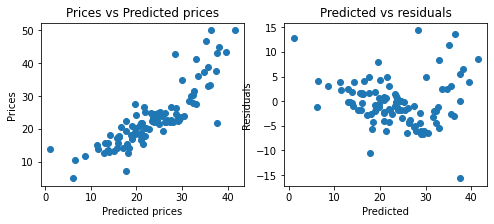

In [9]:
ridge = Ridge(alpha=0.01)  # Empirically, use hyperparameter alpha=0.01
ridge.fit(X_train, y_train)

# Evaluation on testing set
evaluate(ridge, X_test, y_test)

<a name='3-2'></a>
### 3.2 - Lasso regression

The Lasso is a linear model that estimates sparse coefficients. It consists of a linear model with an added regularization term. The objective function to minimize is:
$$
\min _{\boldsymbol{w}}\|\boldsymbol{X} {\boldsymbol{w}}-\boldsymbol{y}\|_{2}^{2}+\alpha\|\boldsymbol{w}\|_{1}
$$

However, the derivative of the cost function has no closed form (due to the L1 loss on the weights). Thus, we use scikit-learn’s built in function for calculating the ideal weights. However, this still requires we pick the ideal shrinkage parameter (as we did for ridge). We take the same approach that we took in ridge regression to search for the ideal regularization parameter on the validation data.

In [10]:
from sklearn.linear_model import Lasso


def get_lasso_model(alpha):
    model = Lasso(alpha=alpha, normalize=False)
    model.fit(X_train, y_train)
    return model

lasso = get_lasso_model(alpha=0.01) # Empirically, use hyperparameter alpha=0.01

Error on testing set:
MAE: 3.474968123509128
MSE: 22.322296511621357


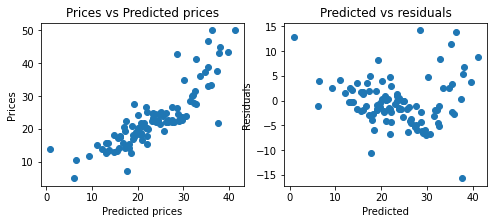

In [11]:
# Evaluation on testing set
evaluate(lasso, X_test, y_test)